<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/extreme_gradient_boosting_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extreme Gradient Boosting in R (XGBoost)

Zia Ahmed, University at Buffalo

XGBoost (eXtreme Gradient Boosting) is a popular open-source machine learning library that is used to build gradient boosting models. It was first introduced in 2016 and has since become one of the most widely used and highly regarded machine learning algorithms for structured data.

The XGBoost algorithm works by building a series of decision trees, where each subsequent tree tries to correct the errors of the previous tree. The algorithm also employs a gradient-based optimization approach to find the optimal set of parameters for each decision tree.

XGBoost has several key features that make it popular among data scientists and machine learning practitioners. Firstly, it can handle missing values in the data, which is a common problem in real-world datasets. Secondly, it supports parallel processing, which makes it scalable and efficient for large datasets. Thirdly, it has built-in support for regularization, which helps to prevent overfitting and improve the generalization performance of the model. Finally, it provides a variety of evaluation metrics to measure the performance of the model, including accuracy, precision, recall, and F1 score.

Overall, XGBoost is a powerful and versatile machine learning algorithm that can be used for a wide range of structured data problems, including classification, regression, and ranking. Its ability to handle missing values, support parallel processing, and provide regularization makes it an excellent choice for building accurate and scalable machine learning models.

The XGBoost algorithm works as follows:

1.  Initialize the model with a single decision tree.

2.  Calculate the error between the predicted values and the actual values for each sample in the training dataset.

3.  Train a new decision tree to predict the errors of the previous tree.

4.  Add the new tree to the model and update the predicted values by summing the predictions of all the trees in the model.

5.  Repeat steps 2 to 4 until the model reaches a certain level of accuracy, or until a maximum number of trees is reached.

#### Differences between LightGBM vs XGBoost

LightGBM (Light Gradient Boosting Machine) and XGBoost (Extreme Gradient Boosting) are both gradient boosting algorithms that are widely used in machine learning. While they share many similarities, there are some key differences between the two algorithms:

1.  Speed: LightGBM is generally faster than XGBoost. This is because it uses a more efficient algorithm for finding the best split points, and it employs parallel processing to speed up the training process.

2.  Scalability: LightGBM is more scalable than XGBoost. It can handle larger datasets with higher dimensional features, and it has a smaller memory footprint than XGBoost.

3.  Handling missing values: LightGBM has built-in support for handling missing values in the data, which can be a common problem in real-world datasets. XGBoost also supports handling missing values, but it requires the user to manually specify the missing value handling strategy.

4.  Leaf-wise growth: LightGBM uses a "Leaf-wise" growth strategy, which grows the tree by splitting the leaf that yields the maximum reduction in the loss function, resulting in a more balanced and less deep tree. XGBoost uses a "Level-wise" growth strategy, which grows the tree level-by-level, resulting in a deeper and more unbalanced tree.

### Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314927 sha256=2593e80fd35c7b951a7701c46c04e55b30374a972a121c163d855fd65e785dd0
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install required R packages

In [ ]:
%%R
pkg <- c('tidyverse', 'tidymodels', 'caret', 'Metrics', 'ggpmisc', 'vip', 'patchwork','randomForest','ranger', 'lightgbm', 'fastDummies', 'bonsai', 'gbm', 'xgboost')
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
%%R
# h20
pkgs <- c("RCurl","jsonlite")
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages(lib='drive/My Drive/R/')))) { install.packages(pkg) }
}
install.packages("h2o", type="source",lib='drive/My Drive/R/', repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))

### Load Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(tidymodels)
library(gbm)
library(ggpmisc)
library(vip)
library(fastDummies)
library(xgboost)
library(bonsai)
librar(caret)

## Extreme Gradient Boosting with "XGBoost" package

The XGBoost package in R provides an implementation of the XGBoost algorithm, a powerful and flexible gradient boosting framework. Here are some key features of the XGBoost R package:

1.  High performance: XGBoost is designed to be highly efficient and scalable, making it well-suited for large datasets and high-dimensional feature spaces. The R package provides an interface to the underlying C++ library, which allows it to take advantage of multi-threading and other optimization techniques.

2.  Cross-validation: The XGBoost R package provides tools for cross-validation, which can be used to tune hyperparameters and assess model performance.

3.  Feature importance: XGBoost computes the feature importance by measuring the number of times each feature is split on in the tree building process. The more a feature is used for splitting, the more important it is considered to be. The R package provides functions for visualizing the feature importance and selecting the most important features.

4.  Regularization: XGBoost provides several regularization techniques, such as L1 and L2 regularization, to prevent overfitting. The R package provides options for controlling the amount of regularization.

5.  Missing value handling: XGBoost can handle missing values in the data, using a default direction at each node to handle missing values.

6.  Flexibility: XGBoost can be used for a wide range of machine learning tasks, including regression, classification, and ranking.

### Data

In this exercise we will use following data se and use DEM, MAP, MAT, NAVI, NLCD, and FRG to fit a GBM regression model.

[gp_soil_data.csv](https://www.dropbox.com/s/9ikm5yct36oflei/gp_soil_data.csv?dl=0)

In [ ]:
%%R
# load data from github
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data.csv"
mf<-read_csv(url(urlfile))
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, Aspect, TPI, KFactor, SiltClay, MAT, MAP,NDVI, NLCD, FRG)%>%
    glimpse()

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 467
Columns: 12
$ SOC      <dbl> 15.763, 15.883, 18.142, 10.745, 10.479, 16.987, 24.954, 6.288…
$ DEM      <dbl> 2229.079, 1889.400, 2423.048, 2484.283, 2396.195, 2360.573, 2…
$ Slope    <dbl> 5.6716146, 8.9138117, 4.7748051, 7.1218114, 7.9498644, 9.6632…
$ Aspect   <dbl> 159.1877, 156.8786, 168.6124, 198.3536, 201.3215, 208.9732, 2…
$ TPI      <dbl> -0.08572358, 4.55913162, 2.60588670, 5.14693117, 3.75570583, …
$ KFactor  <dbl> 0.31999999, 0.26121211, 0.21619999, 0.18166667, 0.12551020, 0…
$ SiltClay <dbl> 64.84270, 72.00455, 57.18700, 54.99166, 51.22857, 45.02000, 5…
$ MAT      <dbl> 4.5951686, 3.

### Data preparation

In [ ]:
%%R
tmp <- df[, c(11:12)]
# create dummy variables
tmp1 <- dummy_cols(tmp)
tmp1 <- tmp1[,3:12]

# create a dataframe
d <- data.frame(df[, c(1:10)], tmp1)
m <- as.matrix(d)

### Create training and Test data set

In [ ]:
%%R
set.seed(123)
indices <- sample(1:nrow(df), size = 0.75 * nrow(df))
train <- m[indices,]
test <- m[-indices,]

### Load the train and test data into the xgboost dataset object

In [ ]:
%%R
#define predictor and response variables in training set
train_x = data.matrix(train[, -1])
train_y = train[,1]

#define predictor and response variables in testing set
test_x = data.matrix(test[, -1])
test_y = test[, 1]

#define final training and testing sets
xgb_train = xgb.DMatrix(data = train_x, label = train_y)
xgb_test = xgb.DMatrix(data = test_x, label = test_y)

### Fit XGBoost model

Next, we'll fit the XGBoost model by using the xgb.train() function, which displays the training and testing RMSE (root mean squared error) for each round of boosting. We use a few tunning prameters with default values.

In [ ]:
%%R
#define watchlist
watchlist = list(train=xgb_train,
                 test=xgb_test)

#fit XGBoost model and display training and testing data at each round
xgboost_model = xgb.train(
                data = xgb_train,
                max.depth = 6, 			# max_depth maximum depth of a tree
                eta = 0.3,					# eta control learning rate
                nround = 1000,			# max number of boosting iterations.
                watchlist = watchlist,
                objective = "reg:linear",	  # objective specify the learning task
                early_stopping_rounds = 100, # round for early stopping
                print_every_n = 500)
xgboost_model


[15:14:22] WARNING: src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[1]	train-rmse:5.845926	test-rmse:6.275015 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 100 rounds.

Stopping. Best iteration:
[7]	train-rmse:2.065355	test-rmse:4.134119

##### xgb.Booster
raw: 269.8 Kb 
call:
  xgb.train(data = xgb_train, nrounds = 1000, watchlist = watchlist, 
    print_every_n = 500, early_stopping_rounds = 100, max.depth = 6, 
    eta = 0.3, objective = "reg:linear")
params (as set within xgb.train):
  max_depth = "6", eta = "0.3", objective = "reg:linear", validate_parameters = "TRUE"
xgb.attributes:
  best_iteration, best_msg, best_ntreelimit, best_score, niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
  cb.early.stop(stopping_rounds = early_stopping_rounds, maximize = maximize, 
    verbose = verbose)
# of features: 19 
niter: 107
best_i

### Prediction

In [ ]:
%%R
yhat_fit_base <- predict(xgboost_model,train[,2:20])
yhat_predict_base <- predict(xgboost_model,test[,2:20])

In [ ]:
%%R
caret::RMSE(train_y,yhat_fit_base) # training


[1] 2.065355


In [ ]:
%%R
caret::RMSE(test_y,yhat_predict_base) # test

[1] 4.134118



## Tunning XGBoost with tidymodel

The tidymodels provides a comprehensive framework for building, tuning, and evaluating XGBoost model while following the principles of the tidyverse.


### Load and process the Data

In [ ]:
%%R
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data.csv"
mf<-read_csv(url(urlfile))
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, Aspect, TPI, KFactor, SiltClay, MAT, MAP,NDVI, NLCD, FRG)
# convrt factor
df$NLCD <- as.factor(df$NLCD)
df$FRG <- as.factor(df$FRG)
# Split data
set.seed(1245)   # for reproducibility
split <- initial_split(df, prop = 0.8, strata = SOC)
train <- split %>% training()
test <-  split %>% testing()
# Set 10 fold cross-validation data set
cv_folds <- vfold_cv(train, v = 5)

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Create Recipe

A recipe is a description of the steps to be applied to a data set in order to prepare it for data analysis. Before training the model, we can use a recipe to do some pre-processing required by the model.

In [ ]:
%%R
# Create a recipe
xgboost_recipe <-
  recipe(SOC ~ ., data = train) %>%
  step_zv(all_predictors()) %>%
  step_dummy(all_nominal()) %>%
  step_normalize(all_numeric_predictors())

### Specify tunable Hypermeters of XGBoost

We will tune following Hypermeters:

-   mtry

-   trees

-   min_n

-   tree_depth

-   learn_rate (eta)

-   loss_reduction

-   sample_size

In [ ]:
%%R
xgboost_model <- boost_tree(
  trees = 1000,
  tree_depth = tune(),
  min_n = tune(),
  loss_reduction = tune(),
  sample_size = tune(),
  mtry = tune(),
  learn_rate = tune()
) %>%
  set_mode("regression") %>%
  set_engine("xgboost")

xgboost_model

Boosted Tree Model Specification (regression)

Main Arguments:
  mtry = tune()
  trees = 1000
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()
  sample_size = tune()

Computational engine: xgboost 



### Create a workflow

In [ ]:
%%R
xgboost_wf <- workflow() %>%
    add_model(xgboost_model) %>%
    add_recipe(xgboost_recipe)

xgboost_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_zv()
• step_dummy()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (regression)

Main Arguments:
  mtry = tune()
  trees = 1000
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()
  sample_size = tune()

Computational engine: xgboost 



### Define grid parameters

For grid search we will use use Grid Latin Hypercube (GLH) technique which select a representative subset of parameter combinations in a high-dimensional search space to find the optimal combination of hyperparameters. The GLH technique is a useful tool for hyperparameter tuning and optimization in machine learning, especially when dealing with high-dimensional search spaces and limited computational resources.

The GLH technique works by dividing the search space into a grid of equal-sized cells, and then randomly selecting one point within each cell. This ensures that the selected points are evenly spaced across the search space, while also avoiding redundancy and oversampling in certain regions. The resulting subset of parameter combinations can then be used to train and evaluate machine learning models, and to select the optimal hyperparameters based on performance metrics.

In [ ]:
%%R
xgboost_grid <- parameters(xgboost_model) %>%
    finalize(train) %>%
    grid_latin_hypercube(size = 30)
head(xgboost_grid)

# A tibble: 6 × 6
   mtry min_n tree_depth learn_rate loss_reduction sample_size
  <int> <int>      <int>      <dbl>          <dbl>       <dbl>
1     3    30          4     0.189   4.79                0.190
2     8    19          6     0.0170  0.00000169          0.857
3     1    39          3     0.0494  0.00000000292       0.572
4     1    37          2     0.232   0.00000497          0.396
5    10    24          1     0.0134  0.0179              0.882
6    11    10          8     0.0195  0.000000164         0.334


In [ ]:
%%R
set.seed(345)
# grid search
xgboost_tune_grid <- xgboost_wf %>%
    tune_grid(
        resamples = cv_folds,
        grid = xgboost_grid,
        control = control_grid(verbose = F),
        metrics = metric_set(rmse, rsq, mae)
    )

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0 standard deviation, resulting in a divide by 0 error. `NA` will be returned.
There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x5



In [ ]:
%%R
collect_metrics(xgboost_tune_grid )

# A tibble: 90 × 12
    mtry min_n tree_depth learn_rate loss_reduction sample_size .metric
   <int> <int>      <int>      <dbl>          <dbl>       <dbl> <chr>  
 1     3    30          4     0.189   4.79                0.190 mae    
 2     3    30          4     0.189   4.79                0.190 rmse   
 3     3    30          4     0.189   4.79                0.190 rsq    
 4     8    19          6     0.0170  0.00000169          0.857 mae    
 5     8    19          6     0.0170  0.00000169          0.857 rmse   
 6     8    19          6     0.0170  0.00000169          0.857 rsq    
 7     1    39          3     0.0494  0.00000000292       0.572 mae    
 8     1    39          3     0.0494  0.00000000292       0.572 rmse   
 9     1    39          3     0.0494  0.00000000292       0.572 rsq    
10     1    37          2     0.232   0.00000497          0.396 mae    
# ℹ 80 more rows
# ℹ 5 more variables: .estimator <chr>, mean <dbl>, n <int>, std_err <dbl>,
#   .config <chr>
# ℹ U

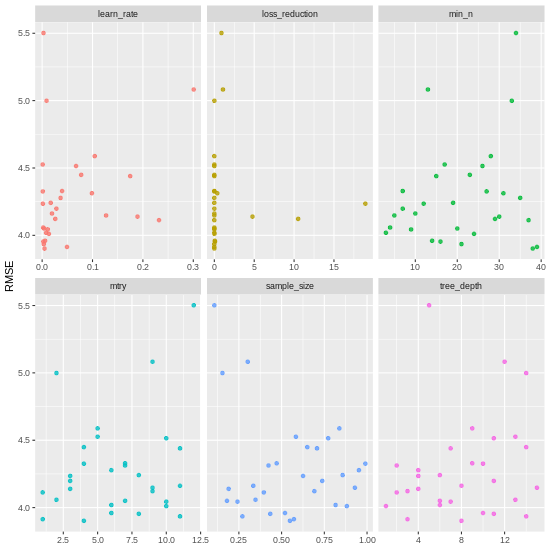

In [ ]:
%%R -w 550 -h 550 -u px
xgboost_tune_grid %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  select(mean, mtry:sample_size) %>%
  pivot_longer(mtry:sample_size,
               values_to = "value",
               names_to = "parameter"
  ) %>%
  ggplot(aes(value, mean, color = parameter)) +
  geom_point(alpha = 0.8, show.legend = FALSE) +
  facet_wrap(~parameter, scales = "free_x") +
  labs(x = NULL, y = "RMSE")

### The XGBoost Model

In [ ]:
%%R
best_rmse <- select_best(xgboost_tune_grid , "rmse")

xgboost_final <- finalize_model(
  xgboost_model,
  best_rmse
)

xgboost_final

Boosted Tree Model Specification (regression)

Main Arguments:
  mtry = 4
  trees = 1000
  min_n = 38
  tree_depth = 8
  learn_rate = 0.00478133186845477
  loss_reduction = 1.00366765721158e-05
  sample_size = 0.548877141447738

Computational engine: xgboost 



### Fit the model

We can either fit final_tree to training data using fit() or to the testing/training split using last_fit(), which will give us some other results along with the fitted output.

In [ ]:
%%R
final_fit <- fit(xgboost_final, SOC ~ .,train)

### Prediction

In [ ]:
%%R
test$SOC.pred = predict(final_fit,test)

In [ ]:
%%R
RMSE<- Metrics::rmse(test$SOC, test$SOC.pred$.pred)
RMSE

[1] 3.515955


### 1:1 Plot of Predicted vs Observed values

`geom_smooth()` using formula = 'y ~ x'


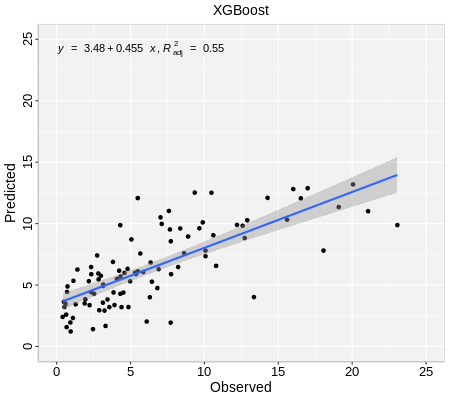

In [ ]:
%%R -w 450 -h 400 -u px
formula<-y~x

ggplot(test, aes(SOC,SOC.pred$.pred)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("XGBoost") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

### Variable Importance

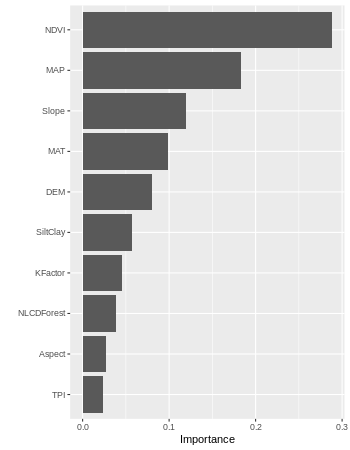

In [36]:
%%R -w 350 -h 450 -u px
xgboost_final %>%
  fit( SOC ~ .,train) %>%
  vip(geom = "col")

## XGBoost with h20

XGBoost is a popular and powerful gradient boosting algorithm that is widely used for supervised machine learning tasks, especially structured data problems like classification and regression. H2O.ai is a platform that provides machine learning and deep learning tools, including an implementation of XGBoost for the R programming language.

**XGBoost is not currently supported on Windows or on the new Apple M1 chip.** It is only supported on  Linux

### Import h2o

In [39]:
%%R
.libPaths('drive/My Drive/R')
library(h2o)
h2o.init(nthreads = -1, max_mem_size = "10g", enable_assertions = FALSE)
#disable progress bar for RMarkdown
h2o.no_progress()
# Optional: remove anything from previous session
h2o.removeAll()

----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’



    day, hour, month, week, year



    cor, sd, var



    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpR59DYw/file81136ae308/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpR59DYw/file814404ef7b/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: ............................. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 seconds 556 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.42.0.2 
    H2O cluster version age:    1 month 
    H2O cluster name:           H2O_started_from_R_root_qtu738 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   10.00 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R

### Load and Process Data

In [37]:
%%R
# loda data from you github
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data.csv"
mf<-read_csv(url(urlfile))
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, Aspect, TPI, KFactor, SiltClay, MAT, MAP,NDVI, NLCD, FRG)
# convrt factor
df$NLCD <- as.factor(df$NLCD)
df$FRG <- as.factor(df$FRG)
# Split data
set.seed(1245)   # for reproducibility
split <- initial_split(df, prop = 0.8, strata = SOC)
train <- split %>% training()
test <-  split %>% testing()
# Scale data
train[-c(1, 11,12)] = scale(train[-c(1,11,12)])
test[-c(1, 11,12)] = scale(test[-c(1,11,12)])

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Load data to h2o cluster

In [40]:
%%R
h_df=as.h2o(df)
h_train = as.h2o(train)
h_test = as.h2o(test)

In [67]:
%%R
CV.xy<- as.data.frame(h_train)
test.xy<- as.data.frame(h_test)

In [41]:
%%R
y <- "SOC"
x <- setdiff(names(h_df), y)

### Fit XGBoost model

We will fit a XGBoost model with following prameters:
* ntrees = Specify the number of trees to build. This option defaults to 50.
* max_depth = Specify the maximum tree depth. Higher values will make the model more complex and can lead to overfitting. Setting this value to 0 specifies no limit. Note that a max_depth limit must be used if grow_policy=depthwise (default). This value defaults to 6.
* min_rows = Specify the minimum number of observations for a leaf (nodesize in R). This option defaults to 1,
* learn_rate = Specify the learning rate by which to shrink the feature weights. Shrinking feature weights after each boosting step makes the boosting process more
* sample_rate =  Specify the row sampling ratio of the training instance (x-axis). This method samples without replacement. For example, setting this value to 0.5 tells XGBoost to randomly collect half of the data instances to grow trees. Higher values may improve training accuracy. Test accuracy improves when either columns or rows are sampled. For details, refer to “Stochastic Gradient Boosting” (Friedman, 1999). This option defaults to 1, and the range is 0.0 to 1.0.,
* col_sample_rate = pecify the column sampling rate (y-axis) for each split in each level. This method samples without replacement. Higher values may improve training accuracy. Test accuracy improves when either columns or rows are sampled. For details, refer to “Stochastic Gradient Boosting” (Friedman, 1999). This value defaults to 1.0, and the range is 0.0 to 1.0.
* col_sample_rate_per_tree = specify the column subsampling rate per tree. This method samples without replacement. Note that it is multiplicative with col_sample_rate and colsample_bynode, so setting all parameters to 0.8, for example, results in 51% of columns being considered at any given node to split. This value defaults to 1.0 and can be a value from 0.0 to 1.0.
* nfolds=10,
* keep_cross_validation_predictions =  Enable this option to keep the cross-validation predictions. This option defaults to False (disabled).
* keep_cross_validation_models = Specify whether to keep the cross-validated models. Keeping cross-validation models may consume significantly more memory in the H2O cluster. This option defaults to True (enabled).
* Dart Booster Options: XGBoost mostly combines a huge number of regression trees with a small learning rate. In this situation  trees added early are significant and trees added late are unimportant. Vinayak and Gilad-Bachrach proposed a new method to add dropout techniques from the deep neural net community to boosted trees, and reported better results in some situations.
This is a instruction of new tree booster dart.

The following additional parameters can be configured when booster=dart:

* sample_type

* normalize_type

* rate_drop

* one_drop

* skip_drop

In [54]:
%%R
xgb_h2o <- h2o.xgboost(x =x,
                           y = y,
                           model_id = "XGBoost_MODEL_ID",
                           training_frame = h_train,
                           ntrees = 500,
                           #max_depth = 5,
                           #min_rows = 10,
                           #learn_rate = 0.01,
                           #sample_rate = 1,
                           #col_sample_rate = 0.05,
                           #col_sample_rate_per_tree = 0.4,
                           nfolds = 10,
                           keep_cross_validation_models = TRUE,
                           keep_cross_validation_predictions = TRUE,
                           booster = "dart",
                           normalize_type = "tree",
                           sample_type = "uniform",
                           rate_drop = 0.6,
                           seed = 1234)

In [57]:
%%R
summary(xgb_h2o)

Model Details:

H2ORegressionModel: xgboost
Model Key:  XGBoost_MODEL_ID 
Model Summary: 
  number_of_trees
1             500

H2ORegressionMetrics: xgboost
** Reported on training data. **

MSE:  4.766075
RMSE:  2.183134
MAE:  1.406554
RMSLE:  0.2645947
Mean Residual Deviance :  4.766075



H2ORegressionMetrics: xgboost
** Reported on cross-validation data. **
** 10-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  19.11642
RMSE:  4.372233
MAE:  2.945398
RMSLE:  0.5293303
Mean Residual Deviance :  19.11642


Cross-Validation Metrics Summary: 
                            mean       sd cv_1_valid cv_2_valid cv_3_valid
mae                     2.878758 0.446375   2.628440   3.819841   3.084841
mean_residual_deviance 18.108053 7.555121  17.187157  32.999985  19.700863
mse                    18.108053 7.555121  17.187157  32.999985  19.700863
r2                      0.210398 0.148868   0.108851   0.259486   0.383157
residual_deviance      1

In [56]:
%%R
h2o.performance(xgb_h2o, h_train)
h2o.performance(xgb_h2o, xval = TRUE)
h2o.performance(xgb_h2o, newdata =h_test)

H2ORegressionMetrics: xgboost

MSE:  12.45111
RMSE:  3.528613
MAE:  2.65026
RMSLE:  0.4911706
Mean Residual Deviance :  12.45111



### Fit XGBoost model with grid serach

#### Hyper prameters and Search Criteria

In [60]:
%%R
# hyper parameters
XGBoost_hyper_params = list( ntrees = seq(50,500,50),
                     max_depth = seq(1,120,1),
                     min_rows = c(1,5,10,20,50,100),
                     learn_rate = seq(0.001,0.01,0.001),
                     sample_rate = seq(0.3,1,0.05),
                     col_sample_rate = seq(0.3,1,0.05),
                     col_sample_rate_per_tree = seq(0.3,1,0.05))

# Search Criteria
XGBoost_search_criteria <- list(strategy = "RandomDiscrete",
                        max_models = 40,
                        max_runtime_secs = 900,
                        stopping_tolerance = 0.001,
                        stopping_rounds = 2,
                        seed = 1345767)


#### Grid search

In [61]:
%%R
# Gird Search
XGBoost_grid <- h2o.grid(
                  algorithm="xgboost",
                  grid_id = "XGBoost_grid_ID",
                  x= x,
                  y = y,
                  training_frame = h_train,
                  #validation_frame = h_valid,
                  stopping_metric = "rmse",
                  #fold_assignment ="Stratified",
                  nfolds=10,
                  keep_cross_validation_predictions = TRUE,
                  keep_cross_validation_models = TRUE,
                  hyper_params = XGBoost_hyper_params,
                  search_criteria = XGBoost_search_criteria,
                  booster = "dart",
                  normalize_type = "tree",
                  seed = 42)

#### Number of XGBoost models trained

In [62]:
%%R
length(XGBoost_grid@model_ids)

[1] 20


#### The best XGBoost Model

In [63]:
%%R
XGBoost_get_grid <- h2o.getGrid("XGBoost_grid_ID",sort_by="rmse",decreasing=FALSE)
best_XGBoost <- h2o.getModel(XGBoost_get_grid@model_ids[[1]])
best_XGBoost

Model Details:

H2ORegressionModel: xgboost
Model ID:  XGBoost_grid_ID_model_13 
Model Summary: 
  number_of_trees
1             450


H2ORegressionMetrics: xgboost
** Reported on training data. **

MSE:  9.387405
RMSE:  3.063887
MAE:  2.046725
RMSLE:  0.3719108
Mean Residual Deviance :  9.387405



H2ORegressionMetrics: xgboost
** Reported on cross-validation data. **
** 10-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  15.89775
RMSE:  3.987199
MAE:  2.758367
RMSLE:  0.4954589
Mean Residual Deviance :  15.89775


Cross-Validation Metrics Summary: 
                            mean       sd cv_1_valid cv_2_valid cv_3_valid
mae                     2.761355 0.442237   2.254106   2.849813   3.225714
mean_residual_deviance 15.822640 5.020673  11.035502  16.995440  20.728458
mse                    15.822640 5.020673  11.035502  16.995440  20.728458
r2                      0.343554 0.096070   0.269261   0.345833   0.156154
residual_devianc

#### Model Performance

In [64]:
%%R
h2o.performance(best_XGBoost, h_train)
h2o.performance(best_XGBoost, xval = TRUE)
h2o.performance(best_XGBoost, newdata =h_test)

H2ORegressionMetrics: xgboost

MSE:  12.02313
RMSE:  3.467439
MAE:  2.43589
RMSLE:  0.4797234
Mean Residual Deviance :  12.02313



#### Prediction

In [68]:
%%R
test.pred.best_xgb<-as.data.frame(h2o.predict(object = best_XGBoost, newdata = h_test))
test.xy$best_XGB_SOC<-test.pred.best_xgb$predict


### 1:1 Plot of Observed vs Predicted Values

`geom_smooth()` using formula = 'y ~ x'


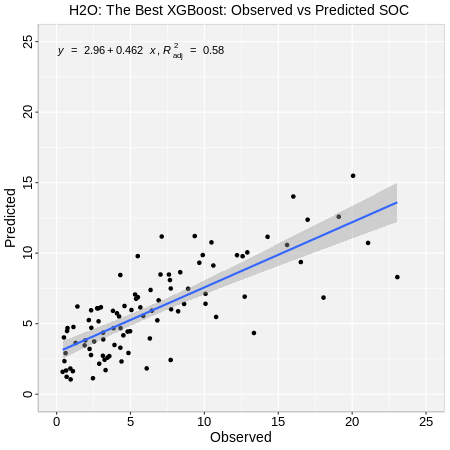

In [70]:
%%R -w 450 -h 450 -u px
formula<-y~x

ggplot(test.xy, aes(SOC,best_XGB_SOC)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("H2O: The Best XGBoost: Observed vs Predicted SOC ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

### Variable Importnace

In [71]:
%%R
h2o.varimp(best_XGBoost)

Variable Importances: 
                    variable relative_importance scaled_importance percentage
1                       NDVI        86942.664062          1.000000   0.274164
2                        MAP        46542.355469          0.535322   0.146766
3                      Slope        40200.593750          0.462381   0.126768
4                        MAT        30801.824219          0.354277   0.097130
5                   SiltClay        24854.867188          0.285877   0.078377
6                    KFactor        22102.652344          0.254221   0.069698
7                        DEM        21357.250000          0.245648   0.067348
8                     Aspect        19893.771484          0.228815   0.062733
9                        TPI        14021.918945          0.161278   0.044217
10               NLCD.Forest         5381.011719          0.061891   0.016968
11  FRG.Fire Regime Group II         1557.324463          0.017912   0.004911
12            NLCD.Shrubland         1116

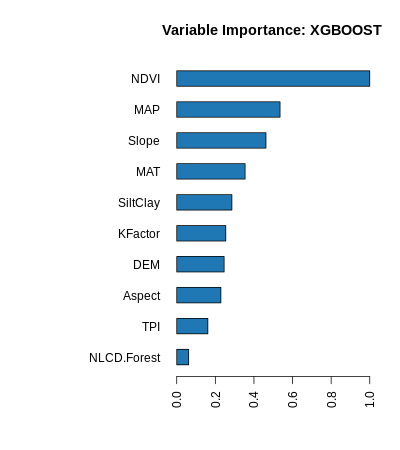

In [73]:
%%R -w 400 -h 450 -u px
h2o.varimp_plot(best_XGBoost)

### SHAP Local Explanation

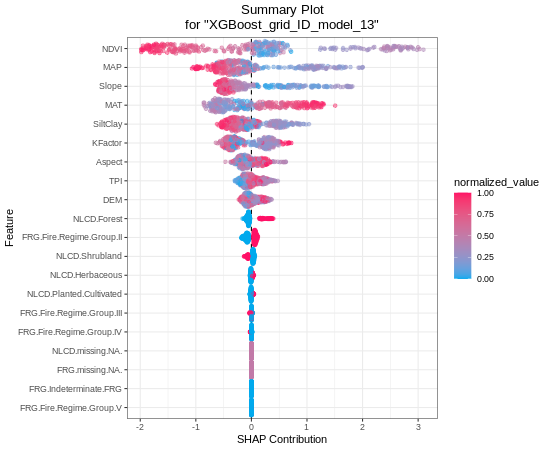

In [74]:
%%R -w 550 -h 450 -u px
h2o.shap_summary_plot(best_XGBoost, h_train)

#### Partial Dependence (PD) Plots

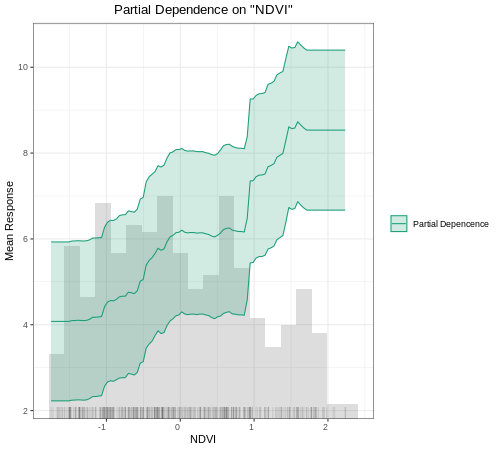

In [75]:
%%R -w 500 -h 450 -u px
h2o.pd_multi_plot(best_XGBoost, h_train, "NDVI")

### Further Reading

1.  [Gradient Boosting and Parameter Tuning in R](https://www.kaggle.com/code/camnugent/gradient-boosting-and-parameter-tuning-in-r/)

2.  [XGBoost in R: A Step-by-Step Example](https://www.statology.org/xgboost-in-r/)

3.  [Tune XGBoost with tidymodels](https://juliasilge.com/blog/xgboost-tune-volleyball/)

4. [XGBoost in h20](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html)

###  YouTube Video

1. XGBoost Part 1 (of 4): Regression

{{< video https://www.youtube.com/watch?v=OtD8wVaFm6E >}}

Source: [StatQuest with Josh Starme](https://www.youtube.com/@statquest)